In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [18]:
def load_wine_data(path_to_dir, filename, csv_separator):
    csv_path = os.path.join(path_to_dir, filename)
    return pd.read_csv(csv_path, sep=csv_separator)
#os.path.dirname(path) return the parent directory of the given path
PARENT_DIR = os.path.dirname(os.getcwd())
WINE_DIR = os.path.join(PARENT_DIR, "Data set")
print(PARENT_DIR)
print(WINE_DIR)

d:\Documents\GitHub\WineQuality
d:\Documents\GitHub\WineQuality\Data set


In [19]:
df_red_wine = load_wine_data(WINE_DIR, "winequality-red.csv", ";")
df_white_wine = load_wine_data(WINE_DIR, "winequality-white.csv", ";")

# RobustScaler

### Formula

[formula](https://machinelearningknowledge.ai/sklearn-feature-scaling-with-standardscaler-minmaxscaler-robustscaler-and-maxabsscaler/#Robust-Scaler)

### Data transformed after scaling

In [20]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Before Robust Scaller')

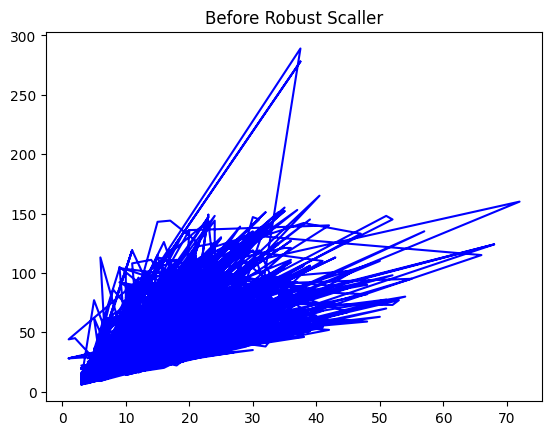

In [21]:
x = df_red_wine['free sulfur dioxide'].values
y = df_red_wine['total sulfur dioxide'].values
plt.plot(x,y,'blue')
plt.title("Before Robust Scaller")

Text(0.5, 1.0, 'After Robust Scaller')

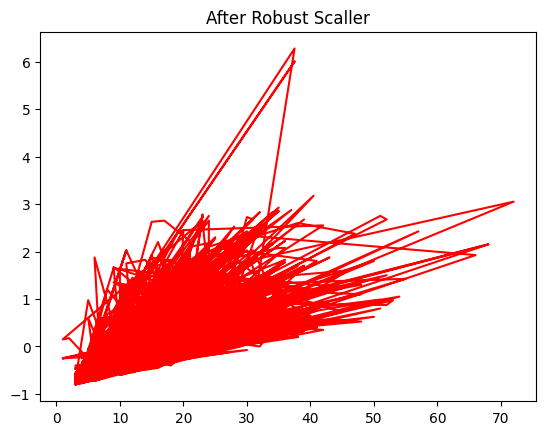

In [22]:
from scipy import stats
x = df_red_wine['free sulfur dioxide'].values
y = df_red_wine['total sulfur dioxide'].values
IQR1 = stats.iqr(y, interpolation = 'midpoint') 
y1_new = (y-np.median(y))/IQR1
plt.plot(x,y1_new,'red')
plt.title("After Robust Scaller")

## Using Scikit Learn 

In [23]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
standardized = scaler.fit_transform(df_red_wine)
standardized

array([[-0.23809524,  0.72      , -0.78787879, ..., -0.33333333,
        -0.5       , -1.        ],
       [-0.04761905,  1.44      , -0.78787879, ...,  0.33333333,
        -0.25      , -1.        ],
       [-0.04761905,  0.96      , -0.66666667, ...,  0.16666667,
        -0.25      , -1.        ],
       ...,
       [-0.76190476, -0.04      , -0.39393939, ...,  0.72222222,
         0.5       ,  0.        ],
       [-0.95238095,  0.5       , -0.42424242, ...,  0.5       ,
         0.        , -1.        ],
       [-0.9047619 , -0.84      ,  0.63636364, ...,  0.22222222,
         0.5       ,  0.        ]])

### Method using scikit learn 
[method](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

##### Compute the median and quantiles to be used for scaling.
    fit(X, y=None)

##### Fit to data, then transform it.
fit_transform(X, y=None, **fit_params)

##### Get output feature names for transformation
get_feature_names_out(input_features=None)

##### Get parameters for this estimator.
get_params(deep=True)[source]

##### Scale back the data to the original representation
inverse_transform(X)

##### Set the parameters of this estimator
set_params(**params)

##### Center and scale the data.
transform(X)
X:{array-like, sparse matrix} of shape (n_samples, n_features)